In [149]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import sys
import os
import random
import time
import copy
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist,pdist, squareform
data = pd.read_csv('digits-embedding.csv',header=None)
itr_count = 50


In [159]:
def within_cluster_sum_of_squares(cluster_data):
    squared = cluster_data.distance_to_centroid * cluster_data.distance_to_centroid
    return squared.sum()

def silhouetteCoefficient(cluster_data):
    #print cluster_data
    Features = cluster_data.iloc[:, [1, 2]]
    distbtwnallpoints = squareform(pdist(Features))
    A = np.zeros(len(cluster_data))
    B = np.zeros(len(cluster_data))
    Si = np.zeros(len(cluster_data))
    for i in range(len(cluster_data)):
        cluster = cluster_data.iloc[i]['min_index']
        samecluster = cluster_data[cluster_data['min_index'] == cluster].index.tolist()
        othercluster = cluster_data[cluster_data['min_index'] != cluster].index.tolist()
        A[i] = np.mean(distbtwnallpoints[i][samecluster])
        B[i] = np.mean(distbtwnallpoints[i][othercluster])
        Si[i] = (B[i]-A[i])/max(A[i], B[i])
    return np.mean(Si)

def nmi(cluster_data):
    C = len(cluster_data['label'].unique())
    G = len(cluster_data['min_index'].unique())
    H_C = 0
    H_G = 0
    I_CG = 0
    for i in range(C):
        P_C = float(len(cluster_data[cluster_data['label'] == i]))/float(len(cluster_data))
        H_C += (-1*P_C*np.log(P_C+0.00001))
        for cluster in range(G):
            P_G = float(len(cluster_data[cluster_data['min_index'] == cluster]))/float(len(cluster_data))
            if i == 0:
                H_G += (-1*P_G*np.log(P_G+0.00001))
            P_CG = float(len(cluster_data[(cluster_data['label'] == i) & \
                                          (cluster_data['min_index'] == cluster)]))/ float(len(cluster_data))
            I_CG += (P_CG*np.log((P_CG/((P_C*P_G)+0.00001))+0.00001))
    nmi = I_CG/(H_C+H_G)
    return nmi
def kmeans(data,itr_count,K):
    np.random.seed(0)
    cluster_data = data.iloc[:, [2, 3]]
    centroids = np.zeros((K,2))
    random_points =  np.random.randint(0,cluster_data.shape[0], size=K)
    centroids = np.array(cluster_data.ix[random_points])
    centroids_prev = np.zeros((K,2))
    euclidean = np.zeros((len(cluster_data),len(centroids)))
    arr_data = np.array(cluster_data)  
    itr = 0
    for i in range(itr_count):
        for i in range(len(cluster_data)):
            for j in range(len(centroids)):
                euclidean[i][j] =  np.linalg.norm(arr_data[i]- centroids[j])
        min_index = np.argmin(euclidean,axis=1)
        cluster_data['min_index'] = min_index
        cluster_data['distance_to_centroid'] = euclidean.min(axis=1)
        if itr < 49:
            for i in range(K):
                temp = cluster_data[cluster_data['min_index']== i]
                #print "temp"
                #print temp
                temp1 =  temp[[2,3]]
                centroids[i] = np.mean(temp1)
            ##print centroids
        if np.array_equal(centroids_prev,centroids) is True:
            itr = itr +1
            break
        else:
            centroids_prev = copy.deepcopy(centroids) 
            itr = itr +1
    #print data
    cluster_data['label'] = data[1]
    cluster_data['image_id'] = data[0]
    #WC_SSD = within_cluster_sum_of_squares(cluster_data)
    #SC = silhouetteCoefficient(cluster_data)
    #NMI = nmi(cluster_data)
    return cluster_data,centroids

def kloop(data):
    for i in [4]:
        print i
        cluster_data,centroids = kmeans(data,itr_count,i)
        #print "cluster_data:",cluster_data
        #print "centroids:",centroids
    return cluster_data,centroids
#print "Total dataset"
#cluster_data,centroids = kloop(data)
print "Dataset 2"
#kloop(data,8)    
data2 = data.loc[data[1].isin([2,4,6,7])].reset_index(drop=True)
cluster_data,centroids = kloop(data2)

#print "Daprintaset 3"
#data3 =  data.loc[data[1].isin([6,7])].reset_index(drop=True)


Dataset 2
4


In [161]:
colors = ['aquamarine', 'g', 'r', 'coral', 'm', 'khaki', 'turquoise', 'navy', 'yellowgreen', 'pink']
#embed = pd.read_csv('digits-embedding.csv', header=None, names=['id', 'label', 'X', 'Y'])

def visualizeFeatures(data,labelVals):
    data.rename(columns={2: 'X'}, inplace=True)
    data.rename(columns={3: 'Y'}, inplace=True)
    examples = np.random.randint(0, len(data), size=1000)
    Examples = data.iloc[examples]
    numLabels = len(data['min_index'].unique())
    Examples = Examples.groupby('min_index')
    fig, ax = plt.subplots()
    for i in range(numLabels):
        X = Examples.get_group(labelVals[i]).X
        Y = Examples.get_group(labelVals[i]).Y
        ax.scatter(X, Y, s = 20,c=colors[i], label=labelVals[i])
    ax.legend()
    plt.xlabel("image-embedding feature_1",fontsize=12,color='purple')
    plt.ylabel("image-embedding feature_2",fontsize=12,color='purple')
    #plt.show()
    plt.savefig('Fig-cluster_2.4_2.png', dpi=80)
    plt.close()

visualizeFeatures(cluster_data, [0,1,2,3,4,5,6,7,8,9])


In [134]:
print cluster_data

               2          3  min_index  distance_to_centroid  label  image_id
0     -13.938318 -20.949436          5             11.539186      5         0
1     -26.283715  16.836709          7              5.177994      0         1
2      36.899612 -19.903789          0             12.849556      4         2
3      12.913048 -16.954055          0             11.821481      1         3
4      22.947148  -2.747205          6              3.497089      9         4
5      -9.380422  35.386284          4              7.154711      2         5
6      12.552243  29.949740          3             13.261740      1         6
7      -8.840524   9.824214          1              7.102967      3         7
8      12.803870  24.873779          3              8.546979      1         8
9      17.556870 -26.461154          0              8.623588      4         9
10    -14.329135  14.184636          1             13.424806      3        10
11     -3.439497 -35.335165          5             13.942921    

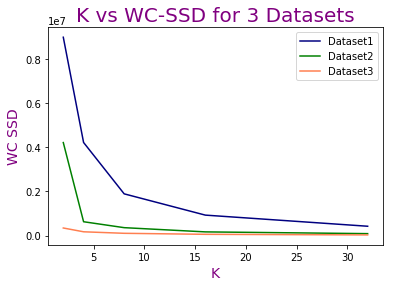

In [87]:

wc_ssd1 = [8983899.99952,4215055.39734,1887699.96365,923735.593278,419486.352473]
wc_ssd1 = np.round(wc_ssd1,3)
wc_ssd2 = [4211155.68851,623865.311168,355343.356408,163874.196695,84594.460362]
wc_ssd2 = np.round(wc_ssd2,3)
wc_ssd3 = [340372.419428,168176.796962,99676.4594897,53547.4852507,26582.9664871]
wc_ssd3 = np.round(wc_ssd3,3)#wcssd
import scipy as sp
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt

x = np.array([2,4,8,16,32])

y = wc_ssd1

y1 = wc_ssd2

y2 = wc_ssd3
#print y
area = np.pi*10

#plt.scatter(x, y, s=area, color = 'purple', alpha=0.5)
plt.plot(x, y, label = 'Dataset1',color = 'navy')
plt.plot(x, y1, label = 'Dataset2',color = 'g',)
plt.plot(x, y2, label = 'Dataset3',color = 'coral',)

plt.title('K vs WC-SSD for 3 Datasets',fontsize=20,color='purple')
plt.xlabel('K',fontsize=14,color='purple')
plt.ylabel('WC SSD',fontsize=14,color='purple')
plt.legend(loc='upper right')
plt.savefig('Fig-2.2.1_WCSSD.pdf',bbox_inches='tight')

plt.autoscale(enable=False, axis='y', tight=True)
plt.show()
plt.close()

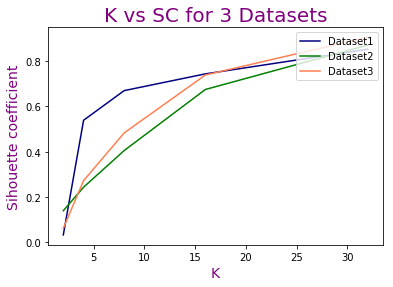

In [168]:
x = np.array([2,4,8,16,32])
y = np.round(np.array([0.03192010261119105,0.5390623074418945,0.6696056646087385,0.7436359984961678,0.8529585364276098]),3)
y1 = np.round(np.array([0.13890974696835429,0.24333322000556451,0.40535111814245672,0.67456627438925243,0.87075588140486637]),3)
y2 = np.round(np.array([0.061446159885829736,0.27191146937014843,0.48314883508933093,0.73893152637155646,0.90646480230767212]),3)
area = np.pi*10

plt.plot(x, y, label = 'Dataset1',color = 'navy')
plt.plot(x, y1, label = 'Dataset2',color = 'g',)
plt.plot(x, y2, label = 'Dataset3',color = 'coral',)
plt.title('K vs SC for 3 Datasets',fontsize=20,color='purple')
plt.xlabel('K',fontsize=14,color='purple')
plt.ylabel('Sihouette coefficient',fontsize=14,color='purple')
plt.legend(loc='upper right')
plt.savefig('Fig-2.3.2_SC.jpg',bbox_inches='tight')
plt.autoscale(enable=False, axis='y', tight=True)
plt.show()
plt.close()

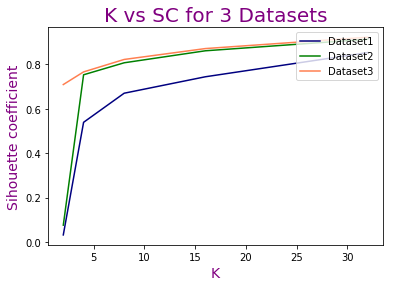

In [165]:
x = np.array([2,4,8,16,32])
y = np.round(np.array([0.03192010261119105,0.5390623074418945,0.6696056646087385,0.7436359984961678,0.8529585364276098]),3)
y1 = np.round(np.array([0.0764053478045465,0.7530532359516512,0.8072002109328441,0.8612300240125899,0.9126459308638912]),3)
y2 = np.round(np.array([0.7089822043356615,0.7663760263309349,0.8218654323488418,0.8705674356567056,0.9221852430250068]),3)
area = np.pi*10

plt.plot(x, y, label = 'Dataset1',color = 'navy')
plt.plot(x, y1, label = 'Dataset2',color = 'g',)
plt.plot(x, y2, label = 'Dataset3',color = 'coral',)
plt.title('K vs SC for 3 Datasets',fontsize=20,color='purple')
plt.xlabel('K',fontsize=14,color='purple')
plt.ylabel('Sihouette coefficient',fontsize=14,color='purple')
plt.legend(loc='upper right')
plt.savefig('Fig-2.2.1_SC.pdf',bbox_inches='tight')
plt.autoscale(enable=False, axis='y', tight=True)
plt.show()
plt.close()